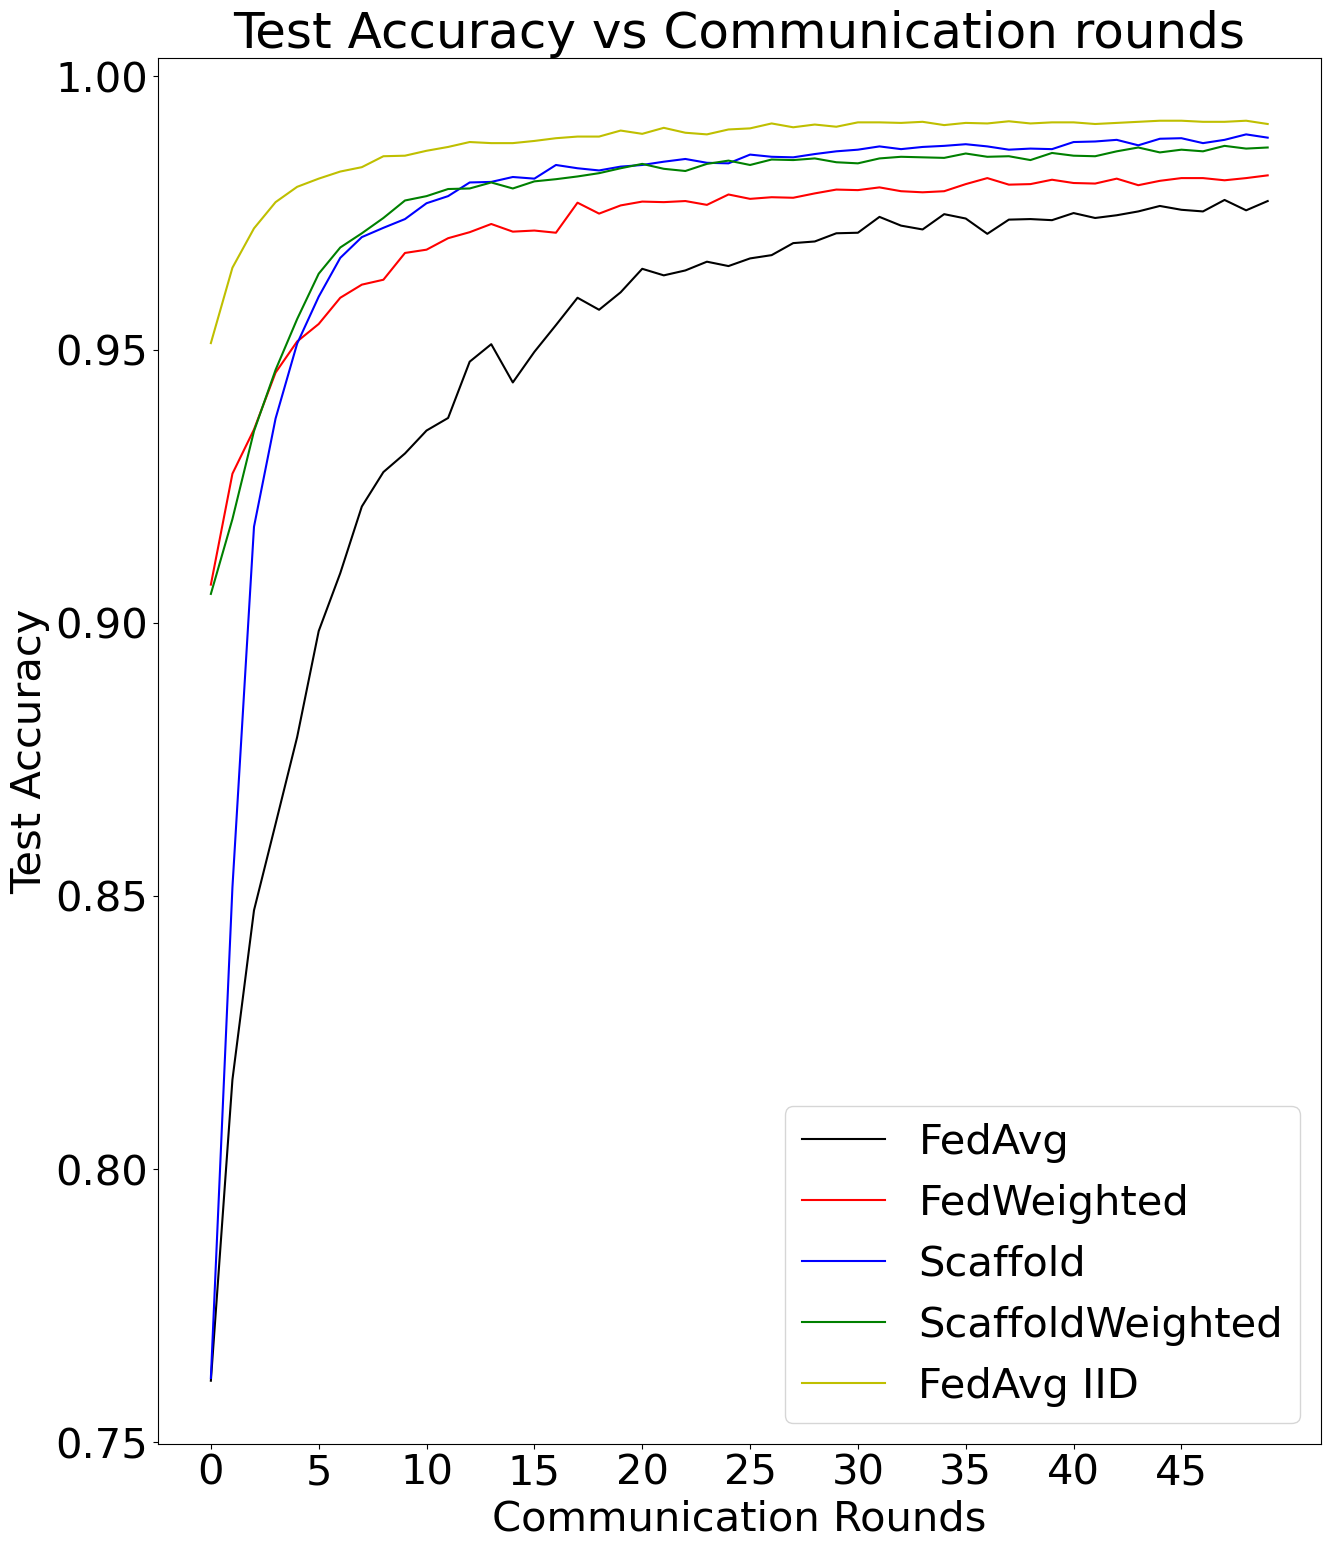

In [30]:
import pickle
import matplotlib.pyplot as plt

# load 3 test_accuracy_list from a file
accuracy_list1, accuracy_list2, accuracy_list3, accuacy_list4, accuracy_list5 = [], [], [], [], []
setting1 = [0, 0]
setting2 = [0, 1]
setting3 = [1, 0]
setting4 = [1, 1]
file_name = f'../save/objects/fed_Scaf{setting1[0]}_Wt{setting1[1]}_mnist_cnn_50_C[1.0]_iid[0]_E[5]_B[10]_test_acc.pkl'
with open(file_name, 'rb') as f:
    accuracy_list1 = pickle.load(f)[0]

file_name = f'../save/objects/fed_Scaf{setting2[0]}_Wt{setting2[1]}_mnist_cnn_50_C[1.0]_iid[0]_E[5]_B[10]_test_acc.pkl'
with open(file_name, 'rb') as f:
    accuracy_list2 = pickle.load(f)[0]

file_name = f'../save/objects/fed_Scaf{setting3[0]}_Wt{setting3[1]}_mnist_cnn_50_C[1.0]_iid[0]_E[5]_B[10]_test_acc.pkl'
with open(file_name, 'rb') as f:
    accuracy_list3 = pickle.load(f)[0]

file_name = f'../save/objects/fed_Scaf{setting4[0]}_Wt{setting4[1]}_mnist_cnn_50_C[1.0]_iid[0]_E[5]_B[10]_test_acc.pkl'
with open(file_name, 'rb') as f:
    accuracy_list4 = pickle.load(f)[0]

file_name = f'../save/objects/fed_Scaf{setting1[0]}_Wt{setting1[1]}_mnist_cnn_50_C[1.0]_iid[1]_E[5]_B[10]_test_acc.pkl'
with open(file_name, 'rb') as f:
    accuracy_list5 = pickle.load(f)[0]




# plot three test accuracy vs communication rounds on one plot
plt.figure(figsize=(15, 18))
plt.title('Test Accuracy vs Communication rounds')
plt.plot(range(len(accuracy_list1)), accuracy_list1, color='k', label=f'FedAvg')
plt.plot(range(len(accuracy_list2)), accuracy_list2, color='r', label=f'FedWeighted')
plt.plot(range(len(accuracy_list3)), accuracy_list3, color='b', label=f'Scaffold')
plt.plot(range(len(accuracy_list4)), accuracy_list4, color='g', label=f'ScaffoldWeighted')
plt.plot(range(len(accuracy_list5)), accuracy_list5, color='y', label=f'FedAvg IID')
plt.ylabel('Test Accuracy')
plt.xlabel('Communication Rounds')
plt.legend()
# x axis only show 0, 5, 10, 15, 20, 25, 30
plt.xticks(range(0, len(accuracy_list1), 5))
# set the largest value of x to 30
# plt.xlim(0, 30)
# set all font sizes to be larger
plt.rcParams.update({'font.size': 20})
plt.savefig('../save/fed_minist_cnn_5_C[1.0]_iid[0]_E[5]_B[10]_test_acc.png')

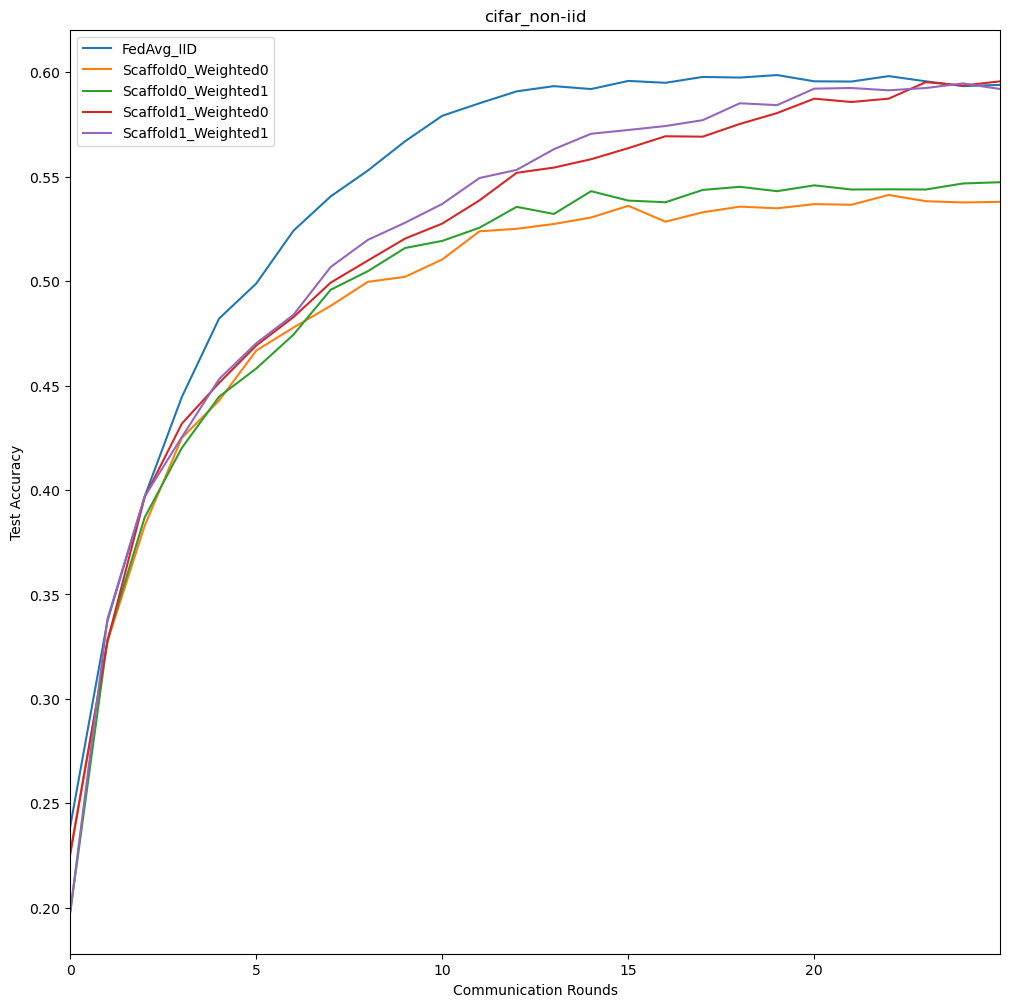

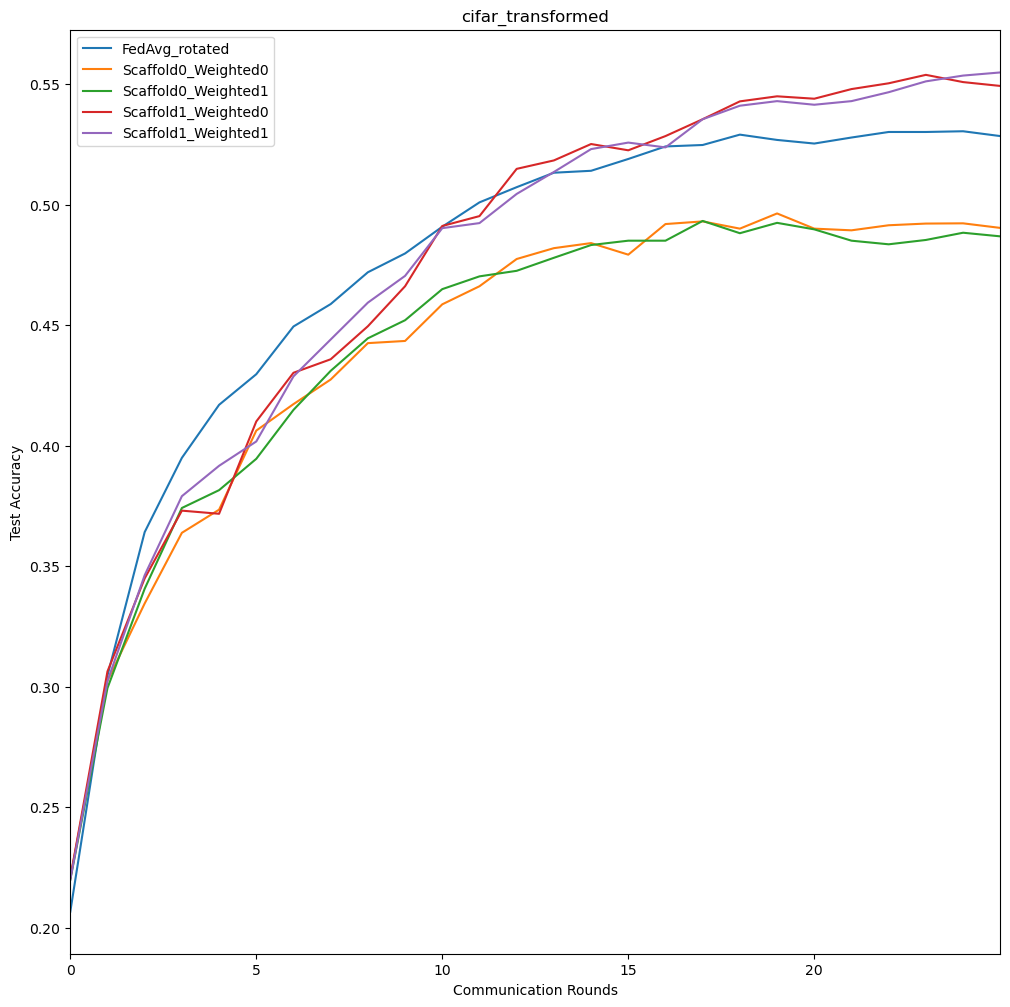

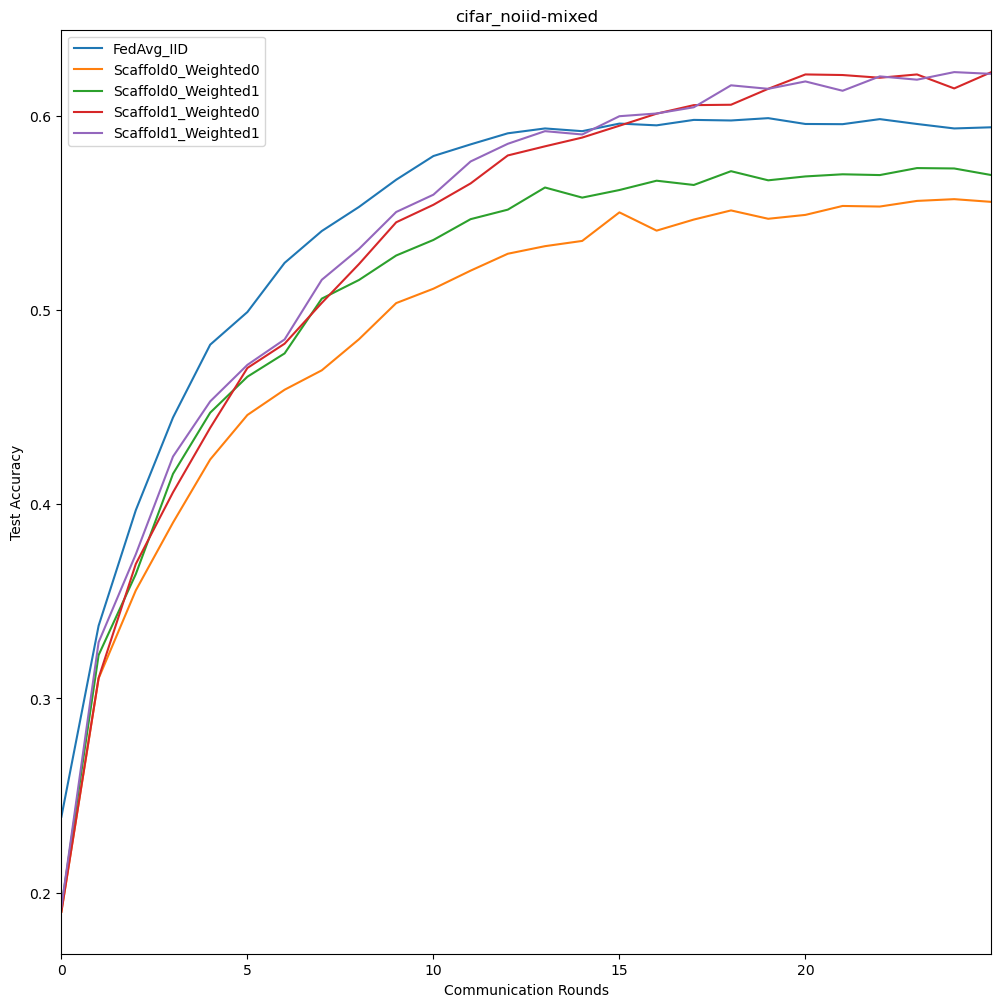

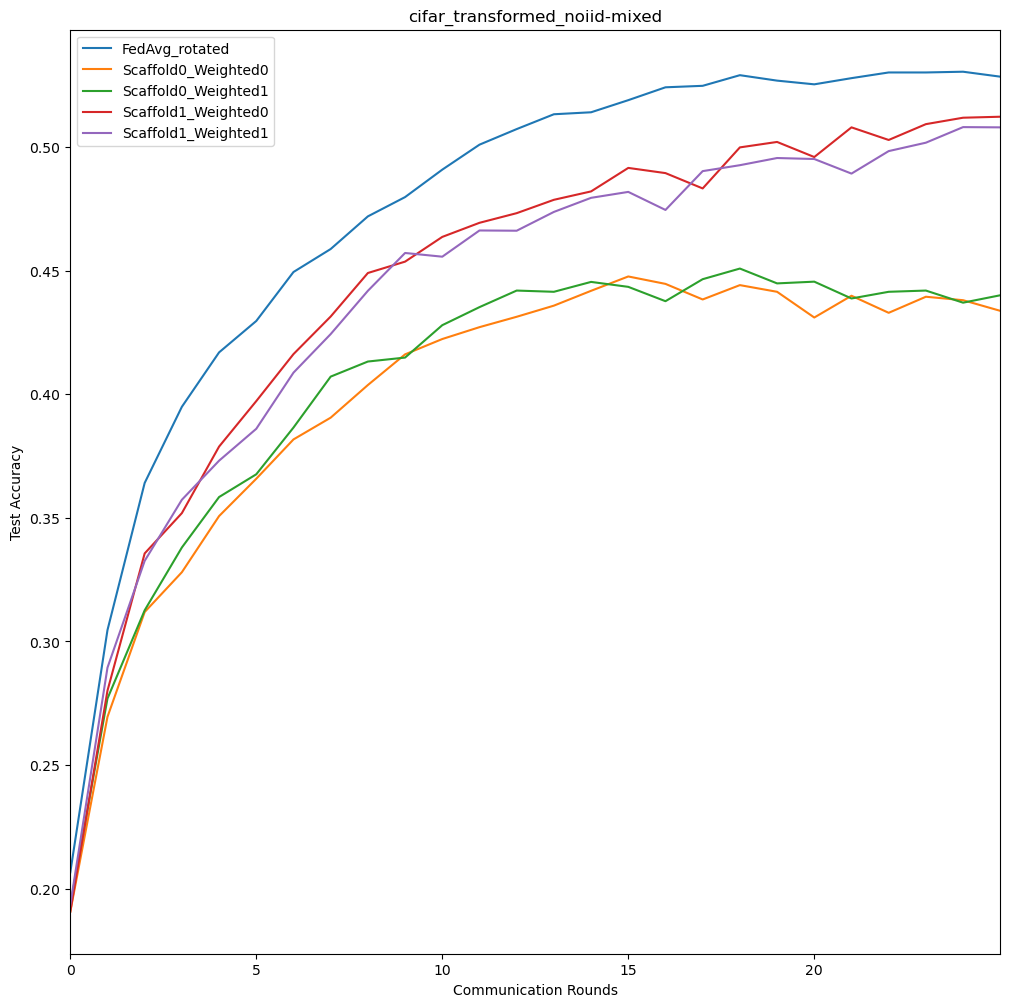

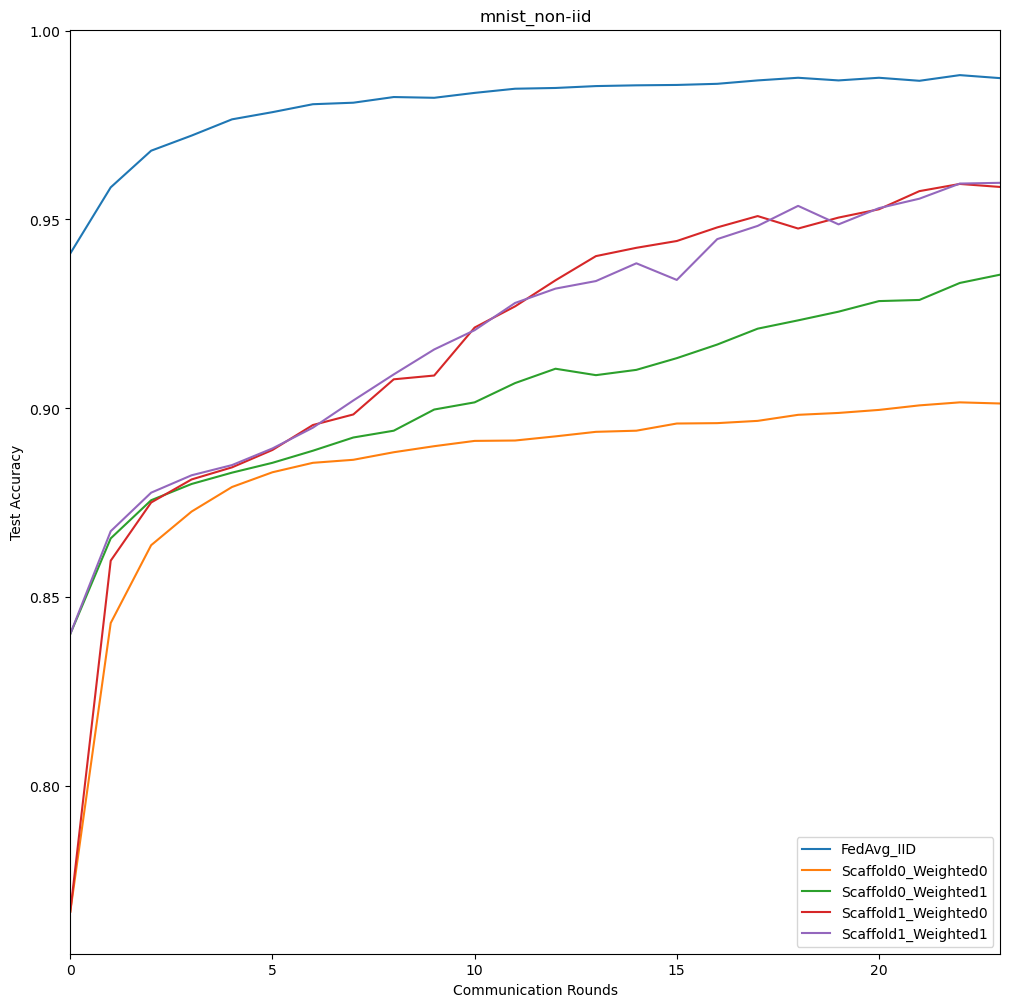

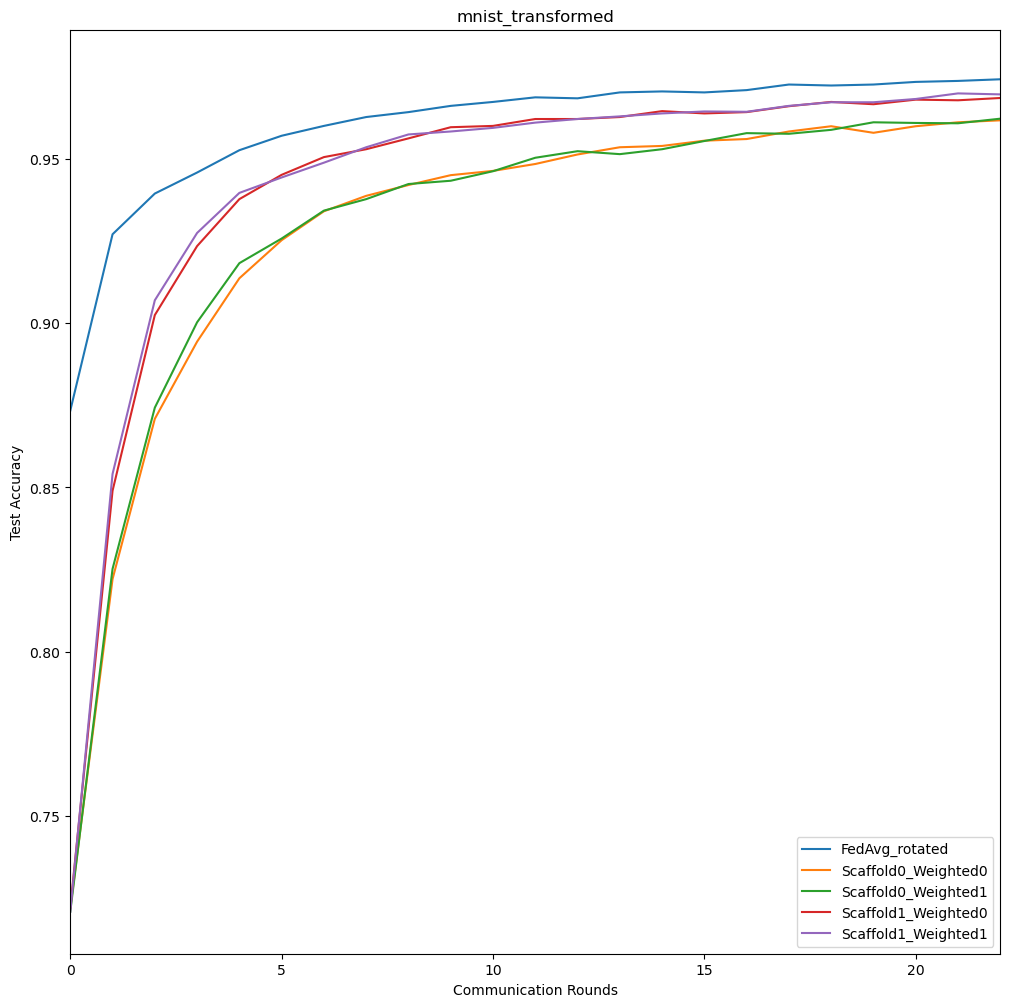

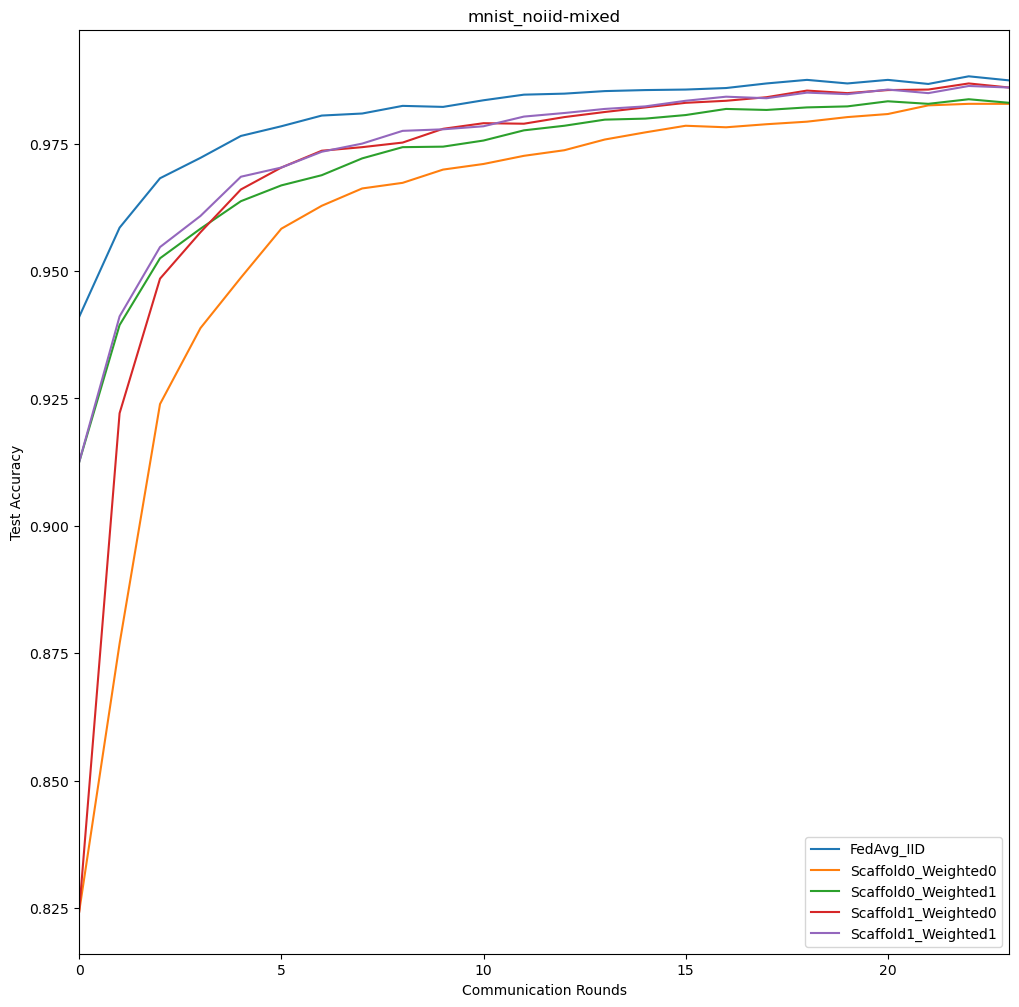

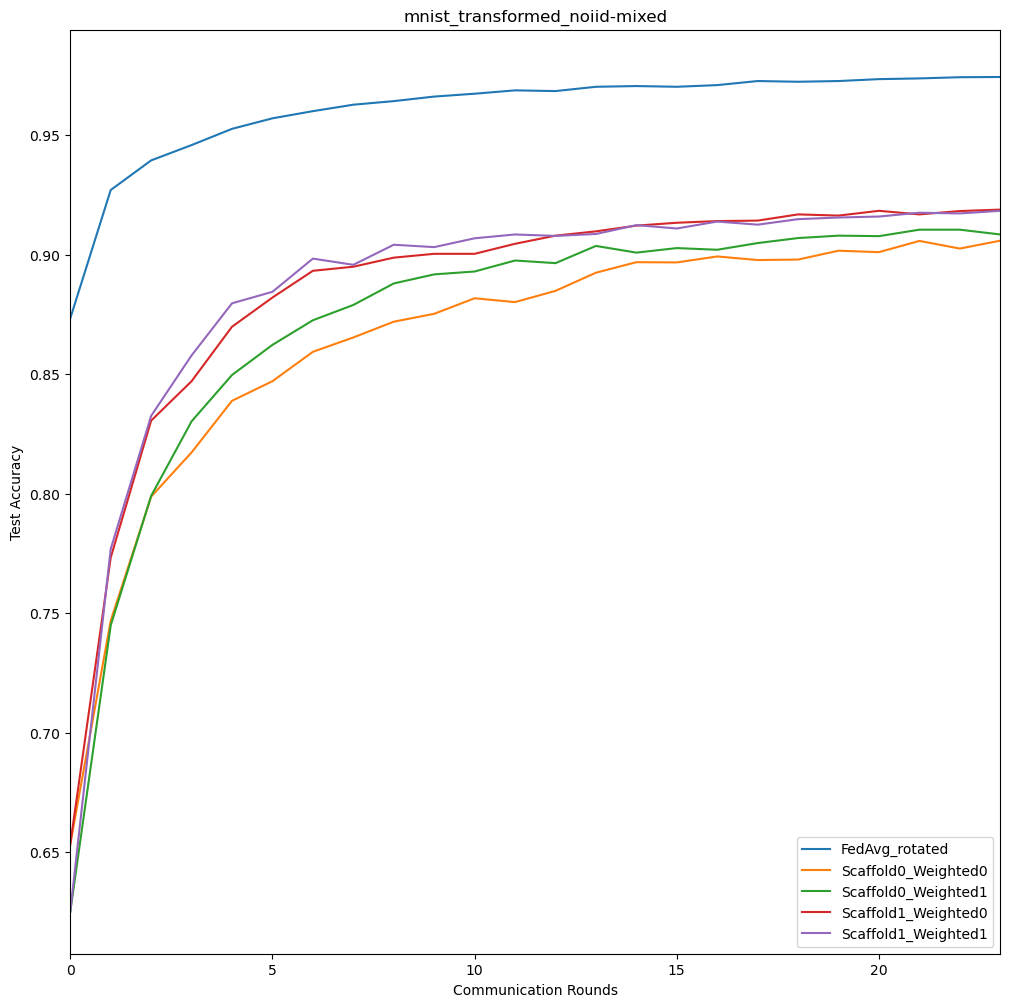

In [22]:
import pickle
import matplotlib.pyplot as plt


def generateAccuracyList(dataset, iid, scaffold, weighted, mix):
    fileName = f'../save/objects/fed_Scaf{scaffold}_Wt{weighted}_Mx{mix}_{dataset}_' + \
        f'cnn_100_C[1.0]_iid[{iid}]_E[5]_B[16]_test_acc.pkl'
    accuracy_list = []
    with open(fileName, 'rb') as f:
        accuracy_list = pickle.load(f)[0]
    return accuracy_list

def plotAccuracyList(accuracy_lists, labels, fileName):
    plt.figure(figsize=(12, 12))
    plt.title(fileName)
    for i in range(len(accuracy_lists)):
        plt.plot(range(len(accuracy_lists[i])), accuracy_lists[i], label=labels[i])
    plt.ylabel('Test Accuracy')
    plt.xlabel('Communication Rounds')
    plt.legend()
    plt.xticks(range(0, min([len(accuracy_list) for accuracy_list in accuracy_lists]) - 1, 5))
    plt.xlim(0, min([len(accuracy_list) for accuracy_list in accuracy_lists]) - 1)
    # plt.rcParams.update({'font.size': 10})
    plt.savefig(f'../save/images/{fileName}.png')

datasets = ["cifar", "mnist"]
algorithms = [(0, 0), (0, 1), (1, 0), (1, 1)]

for dataset in datasets:
    baseline = generateAccuracyList(dataset, 1, 0, 0, 0)

    # for non-iid
    accuracy_lists = []
    labels = []
    accuracy_lists.append(baseline)
    labels.append("FedAvg_IID")
    for algorithm in algorithms:
        scaffold, weighted = algorithm
        accuracy_list = generateAccuracyList(dataset, 0, scaffold, weighted, 0)
        accuracy_lists.append(accuracy_list)
        labels.append(f"Scaffold{scaffold}_Weighted{weighted}")
    plotAccuracyList(accuracy_lists, labels, f"{dataset}_non-iid")

    # for transformed
    accuracy_lists = []
    labels = []
    transformed_baseline = generateAccuracyList(dataset + "_transformed", 1, 0, 0, 0)
    accuracy_lists.append(transformed_baseline)
    labels.append("FedAvg_rotated")
    for algorithm in algorithms:
        scaffold, weighted = algorithm
        accuracy_list = generateAccuracyList(dataset + "_transformed", 0, scaffold, weighted, 2)
        accuracy_lists.append(accuracy_list)
        labels.append(f"Scaffold{scaffold}_Weighted{weighted}")
    plotAccuracyList(accuracy_lists, labels, f"{dataset}_transformed")

    # for noiid-mixed
    accuracy_lists = []
    labels = []
    accuracy_lists.append(baseline)
    labels.append("FedAvg_IID")
    for algorithm in algorithms:
        scaffold, weighted = algorithm
        accuracy_list = generateAccuracyList(dataset, 0, scaffold, weighted, 1)
        accuracy_lists.append(accuracy_list)
        labels.append(f"Scaffold{scaffold}_Weighted{weighted}")
    plotAccuracyList(accuracy_lists, labels, f"{dataset}_noiid-mixed")

    # for transformed-noniid-mixed
    accuracy_lists = []
    labels = []
    accuracy_lists.append(transformed_baseline)
    labels.append("FedAvg_rotated")
    for algorithm in algorithms:
        scaffold, weighted = algorithm
        accuracy_list = generateAccuracyList(dataset + "_transformed", 0, scaffold, weighted, 1)
        accuracy_lists.append(accuracy_list)
        labels.append(f"Scaffold{scaffold}_Weighted{weighted}")
    plotAccuracyList(accuracy_lists, labels, f"{dataset}_transformed_noiid-mixed")
    
